# Lunar Landar Game Normalization

### Min Max Normalization - And Formula | y = (x – min) / (max – min) |

In [5]:
import pandas as pd
from sklearn import preprocessing

In [6]:
# importing game csv file through pandas as a game data frame
game_data_frame = pd.read_csv("./ce889_dataCollection.csv")
game_data_frame.head(5)

,x1,x2,y1,y2
0,-451.927729,431.900000,0.000000,0.000000
1,-451.927729,431.900000,-0.100000,0.040000
2,-451.967729,432.000000,-0.200000,0.000000
3,-451.967729,432.200000,-0.299878,0.033020
4,-452.000749,432.499878,-0.399391,-0.020931


#### Data type of columns

In [7]:
game_data_frame.dtypes

x1    float64
x2    float64
y1    float64
y2    float64
dtype: object

#### Game dataset shape

In [8]:
game_data_frame.shape

(12380, 4)

#### Maximum from each column:

In [9]:
game_data_frame.max()

x1     766.799120
x2    1006.451787
y1       8.000000
y2       7.765852
dtype: float64

#### Minimum from each column:


In [10]:
game_data_frame.min()

x1   -800.389713
x2     65.113279
y1     -5.920036
y2     -7.509682
dtype: float64

#### Checking duplicate values:

In [11]:
game_data_frame.duplicated(keep='last') # We have no any duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
12375    False
12376    False
12377    False
12378    False
12379    False
Length: 12380, dtype: bool

#### Dropping NA values:

In [12]:
game_data_frame.isna().sum() # Checking if there's IsNA or any empty value and printing the count of them

x1    0
x2    0
y1    0
y2    0
dtype: int64

#### Histogram of data before normalization:

<AxesSubplot:ylabel='Density'>

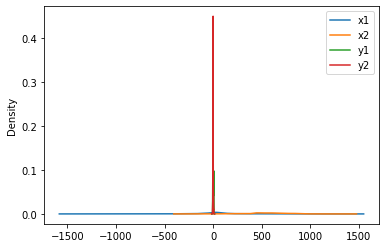

In [13]:
game_data_frame.plot.kde()

In [14]:
# Normalizing dataframe
game_values = game_data_frame.values # Only accessing values of the datafame
min_max_scaler = preprocessing.MinMaxScaler() # Choosing MinMax scaler for normalization between (0-1) 

game_values_scaled = min_max_scaler.fit_transform(game_values) # Scalling the whole data

game_data_frame = pd.DataFrame(game_values_scaled) # Got back my dataframe scaled

#### Training and Validation data partition

In [15]:
train_size = int(len(game_data_frame) * 0.7)
test_size = len(game_data_frame) - train_size
train, test = game_data_frame[0:train_size,:], game_data_frame[train_size:len(game_data_frame),:]

KeyError: (slice(0, 8666, None), slice(None, None, None))

#### Histogram of data after normalization:

<AxesSubplot:ylabel='Density'>

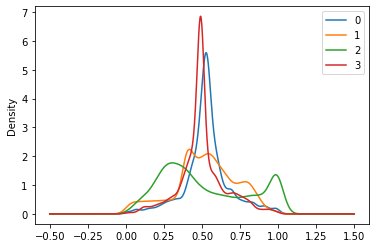

In [16]:
game_data_frame.plot.kde()